<a href="https://colab.research.google.com/github/dariobublitz/DS/blob/main/random_forest_Bublitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load dataset 
permanece= pd.read_csv('/content/drive/MyDrive/colab/Bank_Customer_Churn_Prediction.csv')
permanece.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
permanece.shape

(10000, 12)

In [ ]:
#chequeo de nulos
permanece.isnull().sum()


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
#chequeo de variables
permanece.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
permanece.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [ ]:
#seleccion de variables categoricas

cat_columns = permanece.select_dtypes(include='object').columns
numeric_columns = permanece.select_dtypes(include=np.number).columns

Vamos a chequear la cantidad de valores diferentes en cada categorica.

In [ ]:
#chequeo de dimensionalidad de variables categoricas
lista = []
#loop por columnas categoricas
for col in cat_columns:
  info = (col, permanece[col].nunique(), permanece[col].unique() )
  lista.append(info)
pd.DataFrame(lista, columns=['feature', 'cantidad', 'valores'])

,feature,cantidad,valores
0,country,3,"[France, Spain, Germany]"
1,gender,2,"[Female, Male]"


## Transformacion de categórica a numérica:

 One Hot encoder

### Generacion de modelos

1. Imput y targuet
2. Realizamos un split
2. Transformacion de valores de preproceso para train dataset
3. Entrenamiento 
4. Transformacion en base a lo anterior en el test
5. Predicción
6. Métrica



In [ ]:
#chequeo de desbalanceo
permanece.churn.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: churn, dtype: float64

In [ ]:
#1. input y target

X = permanece.drop(['customer_id','churn'], axis=1)
y = permanece['churn']

#2. split de modelo
from sklearn.model_selection import train_test_split

Xx_train , Xx_test, yy_train, yy_test = train_test_split(X, y , test_size=0.2, random_state=10, stratify=y)

print(Xx_train.shape, yy_train.shape,Xx_test.shape , yy_test.shape)

(8000, 10) (8000,) (2000, 10) (2000,)


In [ ]:
Xx_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,France,Male,30,2,131406.56,1,1,1,47952.45
9654,834,Spain,Male,34,5,0.00,2,0,0,53437.10
4431,616,Germany,Female,42,6,117899.95,2,0,0,150266.81
7206,753,Germany,Female,47,1,131160.85,1,1,0,197444.69
5214,740,Germany,Female,57,3,113386.36,2,1,1,65121.63


In [ ]:
Xx_test.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,Germany,Female,56,2,111920.13,3,1,0,197634.11
5652,691,France,Female,29,9,0.00,2,0,0,199635.93
4081,721,Spain,Male,33,5,0.00,2,0,1,117626.90
2152,745,France,Female,55,9,110123.59,1,0,1,51548.14
641,706,France,Female,29,5,112564.62,1,1,0,42334.38


In [ ]:
yy_train.head()

4498    0
9654    0
4431    0
7206    0
5214    1
Name: churn, dtype: int64

In [ ]:
yy_test.head()

2495    1
5652    0
4081    0
2152    1
641     0
Name: churn, dtype: int64

### Generacion de modelos

1. Imput y targuet
2. Realizamos un split
2. Transformacion de valores de preproceso para train dataset
3. Entrenamiento 
4. Transformacion en base a lo anterior en el test
5. Predicción
6. Métrica



In [ ]:
#chequeo de desbalanceo
permanece.churn.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: churn, dtype: float64

In [ ]:
#1. imput y target

X = permanece.drop(['customer_id','churn'], axis=1)
y = permanece['churn']

#2. split de modelo
from sklearn.model_selection import train_test_split

Xx_train , Xx_test, yy_train, yy_test = train_test_split(X, y , test_size=0.2, random_state=10, stratify=y)

print(Xx_train.shape, yy_train.shape,Xx_test.shape , yy_test.shape)

(8000, 10) (8000,) (2000, 10) (2000,)


In [ ]:
Xx_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,France,Male,30,2,131406.56,1,1,1,47952.45
9654,834,Spain,Male,34,5,0.00,2,0,0,53437.10
4431,616,Germany,Female,42,6,117899.95,2,0,0,150266.81
7206,753,Germany,Female,47,1,131160.85,1,1,0,197444.69
5214,740,Germany,Female,57,3,113386.36,2,1,1,65121.63


In [ ]:
Xx_test.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,Germany,Female,56,2,111920.13,3,1,0,197634.11
5652,691,France,Female,29,9,0.00,2,0,0,199635.93
4081,721,Spain,Male,33,5,0.00,2,0,1,117626.90
2152,745,France,Female,55,9,110123.59,1,0,1,51548.14
641,706,France,Female,29,5,112564.62,1,1,0,42334.38


In [ ]:
yy_train.head()

4498    0
9654    0
4431    0
7206    0
5214    1
Name: churn, dtype: int64

In [ ]:
yy_test.head()

2495    1
5652    0
4081    0
2152    1
641     0
Name: churn, dtype: int64

# <font color='yellow'>OneHotEncoder

In [ ]:

# Importar el OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

Xx_train_ohe=Xx_train.copy()
Xx_test_ohe=Xx_test.copy()
# Generar el encoder
ohe = OneHotEncoder(drop='first', sparse=False)
ohe.fit(Xx_train_ohe[['country','gender'] ])

Xx_train_ohe = ohe.transform(Xx_train_ohe[['country','gender'] ])
Xx_test_ohe = ohe.transform(Xx_test_ohe[['country','gender'] ])
# Ajustar el encoder en el conjunto de entrenamiento

ohe.get_feature_names_out()
#Create a Pandas DataFrame of the hot encoded column
Xx_train_ohe = pd.DataFrame(Xx_train_ohe, columns=ohe.get_feature_names_out())
Xx_test_ohe = pd.DataFrame(Xx_test_ohe, columns=ohe.get_feature_names_out())

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Train

In [ ]:
Xx_train_ohe.head()

,country_Germany,country_Spain,gender_Male
0,0.0,0.0,1.0
1,0.0,1.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
num_col=[ 'credit_score', 'age', 'tenure', 'balance',
        'products_number', 'credit_card', 'active_member', 'estimated_salary']
cat_col=['country','gender']        


In [ ]:
Xx_train[num_col].head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,30,2,131406.56,1,1,1,47952.45
9654,834,34,5,0.00,2,0,0,53437.10
4431,616,42,6,117899.95,2,0,0,150266.81
7206,753,47,1,131160.85,1,1,0,197444.69
5214,740,57,3,113386.36,2,1,1,65121.63


In [ ]:
# Establecer el índice del DataFrame train
Xx_train = Xx_train.set_index(Xx_train.index, drop=False)
# Establecer el índice del segundo DataFrame
Xx_train_ohe = Xx_train_ohe.set_index(Xx_train.index)

In [ ]:
Xx_train_ohe.head()

,country_Germany,country_Spain,gender_Male
4498,0.0,0.0,1.0
9654,0.0,1.0,1.0
4431,1.0,0.0,0.0
7206,1.0,0.0,0.0
5214,1.0,0.0,0.0


In [ ]:
# Concatenar las variables numéricas y categóricas transformadas en un solo DataFrame
X_train_encoded = pd.concat([Xx_train[num_col], Xx_train_ohe], axis=1)

In [ ]:
Xx_train[num_col].shape, Xx_train_ohe.shape, X_train_encoded.shape

((8000, 8), (8000, 3), (8000, 11))

In [ ]:
X_train_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
4498,570,30,2,131406.56,1,1,1,47952.45,0.0,0.0,1.0
9654,834,34,5,0.00,2,0,0,53437.10,0.0,1.0,1.0
4431,616,42,6,117899.95,2,0,0,150266.81,1.0,0.0,0.0
7206,753,47,1,131160.85,1,1,0,197444.69,1.0,0.0,0.0
5214,740,57,3,113386.36,2,1,1,65121.63,1.0,0.0,0.0


## Test

In [ ]:
Xx_test_ohe.head()

,country_Germany,country_Spain,gender_Male
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,1.0,1.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [ ]:
# Establecer el índice del DataFrame train
Xx_test = Xx_test.set_index(Xx_test.index, drop=False)
# Establecer el índice del segundo DataFrame
Xx_test_ohe = Xx_test_ohe.set_index(Xx_test.index)

In [ ]:
Xx_test_ohe.head()

,country_Germany,country_Spain,gender_Male
2495,1.0,0.0,0.0
5652,0.0,0.0,0.0
4081,0.0,1.0,1.0
2152,0.0,0.0,0.0
641,0.0,0.0,0.0


In [ ]:
# Concatenar las variables numéricas y categóricas transformadas en un solo DataFrame
X_test_encoded = pd.concat([Xx_test[num_col], Xx_test_ohe], axis=1)

In [ ]:
X_test_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
2495,466,56,2,111920.13,3,1,0,197634.11,1.0,0.0,0.0
5652,691,29,9,0.00,2,0,0,199635.93,0.0,0.0,0.0
4081,721,33,5,0.00,2,0,1,117626.90,0.0,1.0,1.0
2152,745,55,9,110123.59,1,0,1,51548.14,0.0,0.0,0.0
641,706,29,5,112564.62,1,1,0,42334.38,0.0,0.0,0.0


In [ ]:
X_test_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
2495,466,56,2,111920.13,3,1,0,197634.11,1.0,0.0,0.0
5652,691,29,9,0.00,2,0,0,199635.93,0.0,0.0,0.0
4081,721,33,5,0.00,2,0,1,117626.90,0.0,1.0,1.0
2152,745,55,9,110123.59,1,0,1,51548.14,0.0,0.0,0.0
641,706,29,5,112564.62,1,1,0,42334.38,0.0,0.0,0.0


In [ ]:
Xx_test[num_col].shape,Xx_test_ohe.shape,X_test_encoded.shape

((2000, 8), (2000, 3), (2000, 11))

In [ ]:
X_train_encoded.isnull().sum(),X_test_encoded.isnull().sum()

(credit_score        0
 age                 0
 tenure              0
 balance             0
 products_number     0
 credit_card         0
 active_member       0
 estimated_salary    0
 country_Germany     0
 country_Spain       0
 gender_Male         0
 dtype: int64,
 credit_score        0
 age                 0
 tenure              0
 balance             0
 products_number     0
 credit_card         0
 active_member       0
 estimated_salary    0
 country_Germany     0
 country_Spain       0
 gender_Male         0
 dtype: int64)

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)

# 5. Crear y entrenar el modelo de Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train_encoded, yy_train)

# 6. Realizar predicciones en el conjunto de prueba
yy_pred = rf.predict(X_test_encoded)

# 7. Evaluar el rendimiento del modelo
accuracy = accuracy_score(yy_test, yy_pred)
precision = precision_score(yy_test, yy_pred, average='weighted')
recall = recall_score(yy_test, yy_pred, average='weighted')
f1 = f1_score(yy_test, yy_pred, average='weighted')

print("Precisión (Accuracy): {:.2f}%".format(accuracy * 100))
print("Precisión (Precision): {:.2f}%".format(precision * 100))
print("Sensibilidad (Recall): {:.2f}%".format(recall * 100))
print("F1-Score: {:.2f}%".format(f1 * 100))
print('====================================================')

# Otras métricas de evaluación
print("Classification Report:")
print('====================================================')
print(classification_report(yy_test, yy_pred))
print('====================================================')
print("Confusion Matrix:")
print(confusion_matrix(yy_test, yy_pred))

Precisión (Accuracy): 86.85%
Precisión (Precision): 86.18%
Sensibilidad (Recall): 86.85%
F1-Score: 85.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.80      0.47      0.59       407

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Confusion Matrix:
[[1544   49]
 [ 214  193]]


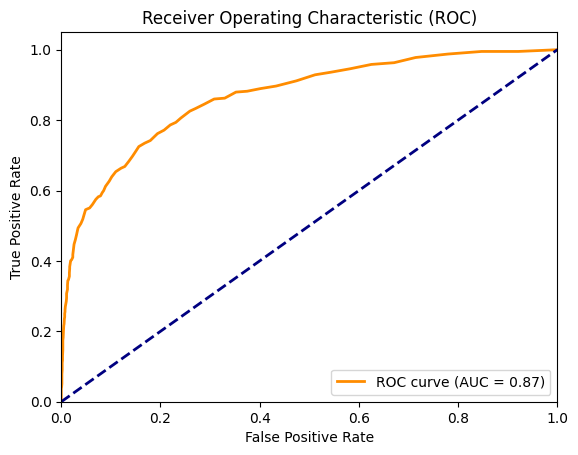

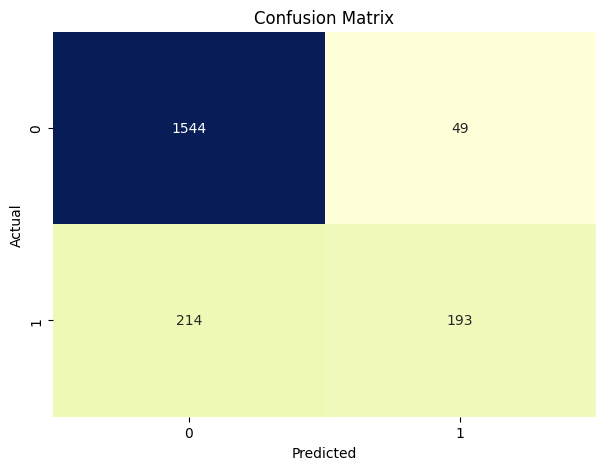

In [ ]:
# graficos Curva 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
# Calcular las probabilidades de predicción
yy_pred_prob = rf.predict_proba(X_test_encoded)

# Continuar con el código de los gráficos de la Curva ROC y la Matriz de Confusión

# Curva ROC
fpr, tpr, thresholds = roc_curve(yy_test, yy_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# gráficos Matriz de confusión
conf_matrix = confusion_matrix(yy_test, yy_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()